In [1]:
import sys; sys.path.insert(0, '..')
from database.dataset import INBreast_Dataset
import matplotlib.pyplot as plt
from metrics.metrics import get_tp_fp_fn, quick_circle_comparison
from general_utils.utils import get_center_bboxes
from tqdm import tqdm
import numpy as np
import h5py
import math

In [2]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        extract_patches=False,
        normalize=None,
        n_jobs=-1,
        partitions=['train']
    )

In [3]:
# import h5py
path = '/home/jseia/Desktop/ml-dl/data/hdog_detections/det_ms-1.18_sr-1.05_Ms-3.1_m-marasinou_dth-0.006_hdiv-200.0_hth-1.14.hdf5'
with h5py.File(path, 'r') as f:
    detections = f[f'{db.df.at[0, "img_id"]}/hessian_detections'][:]

# temp = detections.copy()
# detections[:,0] = temp[:,1]
# detections[:,1] = temp[:,0]

In [4]:
# case = db[0]
# tp, fp, fn, gt_predicted, close_fp = get_tp_fp_fn(
#     case['lesion_bboxes'], case['radiuses'], detections, 10, 0.8, True, case['lesion_mask']
# )
# len(tp), len(fp), len(fn), len(gt_predicted), len(close_fp)

In [5]:
detections[:, 2] = detections[:, 2]*math.sqrt(2)
case = db[0]
tp, fp, fn, gt_predicted, close_fp = get_tp_fp_fn(
    case['lesion_bboxes'], case['radiuses'], detections, 7, 0.2
)
len(tp), len(fp), len(fn), len(gt_predicted), len(close_fp)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1mUnknown attribute 'info' of type Module(<module 'logging' from '/home/jseia/anaconda3/envs/calc_det/lib/python3.9/logging/__init__.py'>)
[1m
File "../metrics/metrics_utils.py", line 56:[0m
[1mdef compute_disk_overlap(d: float, r1: float, r2: float, iou: bool = False):
    <source elided>
        if ((math.pi * (r1) ** 2) + (math.pi * (r2) ** 2) - area) == 0:
[1m            logging.info((math.pi * (r1) ** 2), (math.pi * (r2) ** 2), area)
[0m            [1m^[0m[0m
[0m
[0m[1mDuring: typing of get attribute at /home/jseia/Desktop/ml-dl/calc-det/notebooks/../metrics/metrics_utils.py (56)[0m
[1m
File "../metrics/metrics_utils.py", line 56:[0m
[1mdef compute_disk_overlap(d: float, r1: float, r2: float, iou: bool = False):
    <source elided>
        if ((math.pi * (r1) ** 2) + (math.pi * (r2) ** 2) - area) == 0:
[1m            logging.info((math.pi * (r1) ** 2), (math.pi * (r2) ** 2), area)
[0m            [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_disk_overlap at 0x7f2bac26ca60>))[0m
[0m[1mDuring: typing of call at /home/jseia/Desktop/ml-dl/calc-det/notebooks/../metrics/metrics_utils.py (182)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_disk_overlap at 0x7f2bac26ca60>))[0m
[0m[1mDuring: typing of call at /home/jseia/Desktop/ml-dl/calc-det/notebooks/../metrics/metrics_utils.py (182)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_disk_overlap at 0x7f2bac26ca60>))[0m
[0m[1mDuring: typing of call at /home/jseia/Desktop/ml-dl/calc-det/notebooks/../metrics/metrics_utils.py (182)
[0m
[1m
File "../metrics/metrics_utils.py", line 182:[0m
[1mdef evaluate_pairs_iou_appox(
    <source elided>
                # Overlapping greater than threshold
[1m                elif compute_disk_overlap(d, r1, r2, True) > min_iou:
[0m                [1m^[0m[0m


In [ ]:
import cv2
import math

def create_binary_mask_from_blobs(shape: tuple, blobs_x_y_sigma: list):
    img_binary_blobs = np.zeros(shape)
    for blob in blobs_x_y_sigma:
        img_binary_blobs = cv2.circle(
            img_binary_blobs, (blob[0], blob[1]),
            int(math.sqrt(2) * blob[2]), 255, -1
        )
    return img_binary_blobs

def create_binary_mask_from_point(shape: tuple, blobs_x_y_sigma: list):
    img_binary_blobs = np.zeros(shape)
    for blob in blobs_x_y_sigma:
        img_binary_blobs[blob[1], blob[0]] = 2551
    return img_binary_blobs

In [ ]:
def plot_blobs(image,image_blobs, tp, color):
    f, ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(image,cmap='gray')
    for blob in tqdm(image_blobs):
        x, y, r = blob
        c = plt.Circle((x, y), r+8, color='red', linewidth=1, fill=False)
        ax.add_patch(c)
    for blob in tqdm(tp):
        x, y, r = blob
        c = plt.Circle((x, y), r+2, color='yellow', linewidth=1, fill=False)
        ax.add_patch(c)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

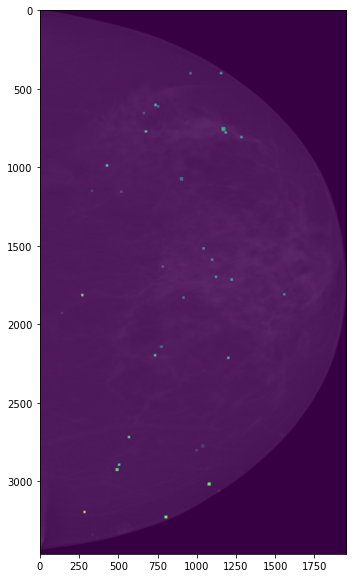

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(case['img'], cmap='gray')
plt.imshow(cv2.dilate(case['lesion_mask'], np.ones((15,15))), alpha=0.8)

100%|██████████| 37/37 [00:00<00:00, 2205.77it/s]


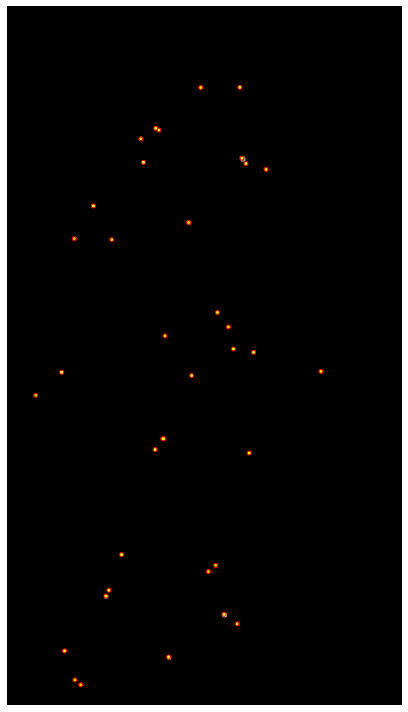

In [ ]:
lesion_bboxes = case['lesion_bboxes']
radiouses = case['radiuses']
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(lesion_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

plot_blobs(cv2.dilate(case['lesion_mask'], np.ones((15,15))), a, a, 'red')

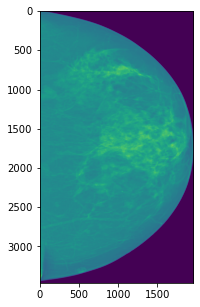

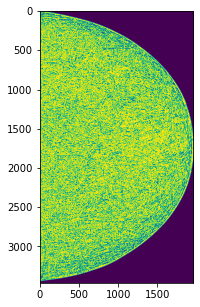

In [9]:
plt.figure(figsize=(15,5))
plt.imshow(case['img'])
plt.figure(figsize=(15,5))
plt.imshow(create_binary_mask_from_blobs(case['img'].shape, fp.astype(int)))

In [39]:

lesion_bboxes = case['lesion_bboxes']
radiouses = case['radiuses']
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(lesion_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

shape = case['img'].shape
mask_fp = create_binary_mask_from_blobs(shape, fp.astype(int))
mask_fn = create_binary_mask_from_blobs(shape, fn.astype(int))
mask_tp = create_binary_mask_from_blobs(shape, tp.astype(int))
mask_gt = create_binary_mask_from_blobs(shape, gt_circles.astype(int))

mask_fp_c = create_binary_mask_from_point(shape, fp.astype(int))
mask_fn_c = create_binary_mask_from_point(shape, fn.astype(int))
mask_tp_c = create_binary_mask_from_point(shape, tp.astype(int))
mask_gt_c = create_binary_mask_from_point(shape, gt_circles.astype(int))

def crop(img, point):
    return img[point[1] - 10 : point[1] + 10,  point[0] - 10 : point[0] + 10]

crop_tp = crop(mask_tp, fn.astype(int)[0])
crop_fp = crop(mask_fp, fn.astype(int)[0])
crop_gt = crop(mask_gt, fn.astype(int)[0])
crop_fn = crop(mask_fn, fn.astype(int)[0])

crop_tp_c = crop(mask_tp_c, fn.astype(int)[0])
crop_fp_c = crop(mask_fp_c, fn.astype(int)[0])
crop_gt_c = crop(mask_gt_c, fn.astype(int)[0])
crop_fn_c = crop(mask_fn_c, fn.astype(int)[0])

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(crop_fn, cmap='gray')
plt.imshow(crop_fp, cmap='gray', alpha=0.1)
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,2)
plt.imshow(crop_fp, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(crop_gt, cmap='gray')
plt.imshow(crop_tp, cmap='gray', alpha=0.1)
plt.imshow(crop_tp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,4)
plt.imshow(crop_tp, cmap='gray')
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.show()

IndexError: index 1954 is out of bounds for axis 1 with size 1954

In [16]:
type(detections)

numpy.ndarray

In [17]:
TP, FP, FN = quick_circle_comparison(
    detections, case['lesion_mask']
)

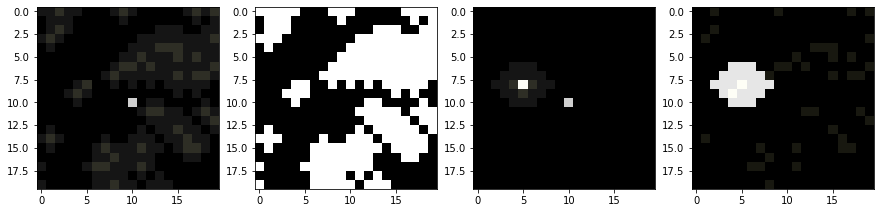

In [14]:
lesion_bboxes = case['lesion_bboxes']
radiouses = case['radiuses']
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(lesion_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

shape = case['img'].shape
mask_fp = create_binary_mask_from_blobs(shape, fp.astype(int))
mask_fn = create_binary_mask_from_blobs(shape, fn.astype(int))
mask_tp = create_binary_mask_from_blobs(shape, tp.astype(int))
mask_gt = create_binary_mask_from_blobs(shape, gt_circles.astype(int))

mask_fp_c = create_binary_mask_from_point(shape, fp.astype(int))
mask_fn_c = create_binary_mask_from_point(shape, fn.astype(int))
mask_tp_c = create_binary_mask_from_point(shape, tp.astype(int))
mask_gt_c = create_binary_mask_from_point(shape, gt_circles.astype(int))

def crop(img, point):
    return img[point[1] - 10 : point[1] + 10,  point[0] - 10 : point[0] + 10]

crop_tp = crop(mask_tp, fn.astype(int)[0])
crop_fp = crop(mask_fp, fn.astype(int)[0])
crop_gt = crop(mask_gt, fn.astype(int)[0])
crop_fn = crop(mask_fn, fn.astype(int)[0])

crop_tp_c = crop(mask_tp_c, fn.astype(int)[0])
crop_fp_c = crop(mask_fp_c, fn.astype(int)[0])
crop_gt_c = crop(mask_gt_c, fn.astype(int)[0])
crop_fn_c = crop(mask_fn_c, fn.astype(int)[0])

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(crop_fn, cmap='gray')
plt.imshow(crop_fp, cmap='gray', alpha=0.1)
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,2)
plt.imshow(crop_fp, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(crop_gt, cmap='gray')
plt.imshow(crop_tp, cmap='gray', alpha=0.1)
plt.imshow(crop_tp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,4)
plt.imshow(crop_tp, cmap='gray')
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.show()